# Carga de datos 

In [1]:
import pandas as pd

import numpy as np


datos = pd.read_excel('beneficiarios_discapacidad.xlsx')#se carga la base de datos

#Transformación de las variables categóricas

df = pd.DataFrame(data=datos) #Se crea un dataframe con los datos

# Transformación de variables categóricas

In [2]:
from sklearn import preprocessing
from collections import defaultdict

df1 = df
d = defaultdict(preprocessing.LabelEncoder)


def SoloInt(X): #Método para saber si toda la columna es de int
    #for j in range (len(X)):
    if not(X.dtype == 'int64'):
            return False
    return True


labels = []
for c in datos:
    labels.append(c)#Contiene todas las características de la base de datos


for i in range (len(labels)):
    if not (SoloInt(df[labels[i]])):
        # Codificando la variable
        df1[labels[i]] = df1[labels[i]].astype(str)
        df1[labels[i]] = d[labels[i]].fit_transform(df[labels[i]])


datosCodificados = df1

for i in range (len(labels)):
    if (labels[i] in d):
        if isinstance(d[labels[i]].classes_[0], str):
            index = np.where(d[labels[i]].classes_ == 'Nulo')[0]
            datosCodificados[labels[i]].replace(index, np.nan , inplace = True)
    else:
        datosCodificados[labels[i]].replace(-1, np.nan , inplace = True)

        
datosCodificados

,proyecto,fechainscripcion,edad,estado_civil,tipo_afiliacion_ss,estrato,estudia,desplazado,tiene_discapacidad,tipo_discapacidad,comunaresidencia,etnia
0,95,6,53,5,5,7,0,0,0,410,6,4
1,95,28,25,4,0,7,0,0,1,421,4,4
2,62,6,25,4,0,2,0,0,1,42,21,4
3,209,58,25,2,1,7,0,0,1,248,3,4
4,209,58,99,2,1,7,0,0,1,513,13,4
5,178,62,35,0,1,2,0,0,1,421,1,4
6,197,26,17,4,1,1,0,0,1,280,2,4
7,178,2,106,2,3,7,0,0,0,421,21,4
8,197,24,104,7,1,7,0,0,1,308,2,5
9,178,51,3,4,1,3,0,0,1,421,8,4


# Llenado de valores faltantes

In [3]:
from sklearn.impute import SimpleImputer

estrategia = SimpleImputer(strategy = 'most_frequent') #Se rellenan los datos faltantes por el método de el dato más frecuente
datosNuevos = estrategia.fit_transform(datosCodificados)

  
labels = []
for c in df:
    labels.append(c)


df_completo = pd.DataFrame(data=datosNuevos, columns=labels)#Creamos un nuevo df para el manejo de outliers

# Manejo de Outliers

In [4]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] >= quant_df.loc[low, name]) & (df[name] <= quant_df.loc[high, name])]
    return df



df_sinOutLiers = remove_outlier(df_completo)
datosNuevos = df_sinOutLiers.values
df_sinOutLiers

,proyecto,fechainscripcion,edad,estado_civil,tipo_afiliacion_ss,estrato,estudia,desplazado,tiene_discapacidad,tipo_discapacidad,comunaresidencia,etnia
0,95,6,53,5,5,7,0,0,0,410,6,4
1,95,28,25,4,0,7,0,0,1,421,4,4
2,62,6,25,4,0,2,0,0,1,42,21,4
5,178,62,35,0,1,2,0,0,1,421,1,4
6,197,26,17,4,1,1,0,0,1,280,2,4
20,62,26,65,4,1,4,0,0,1,421,1,4
23,178,24,76,2,3,7,0,0,0,513,21,4
24,178,24,78,2,5,7,0,0,0,421,21,4
25,178,14,61,0,1,1,0,0,1,517,21,4
27,62,6,67,0,1,3,0,0,1,485,4,4


# Escalamiento de datos

In [5]:
  # Librería numpy pora las operaciones matemáticas
from matplotlib import pyplot # Librería para hacer gráficas
import random # para generar datos aleatorios de forma uniforme 
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler es una librería que permite hacer diferentes escalas de los
                                                 #datos cuando ajustes de valores máximos y mínimos.  
    
MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1

datosEscalados = MinMax_1.fit_transform(datosNuevos) # Transformación de los nuevos datos con una escala MinMax

fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(datosNuevos[:,0], datosNuevos[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosNuevos[:,0].min(), datosNuevos[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosNuevos[:,1].min(), datosNuevos[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Outilers') # Titulo de la gráfica
pyplot.xlabel('Proyecto') # Etiqueta del eje x
pyplot.ylabel('Fecha inscripción') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosEscalados[:,0].min(), datosEscalados[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosEscalados[:,1].min(), datosEscalados[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con MinMax') # Titulo de la gráfica
pyplot.xlabel('Proyecto') # Etiqueta del eje x
pyplot.ylabel('Fecha inscripción') # Etiqueta del eje y

pyplot.show()

<Figure size 1200x500 with 2 Axes>

# Normalización 

In [6]:
xmax = np.amax(datosNuevos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
xmin = np.amin(datosNuevos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
N,D = datosNuevos.shape # Dimenisones de los datos

datosNormalizados = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
for d in np.arange(D):
    for n in np.arange(N):
        datosNormalizados[n][d] = (datosNuevos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4
        
datosNormalizados

#Solo se usa si es necesario

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


array([[0.24264706, 0.06557377, 0.59701493, ..., 0.77586207, 0.23809524,
        0.        ],
       [0.24264706, 0.42622951, 0.17910448, ..., 0.79693487, 0.14285714,
        0.        ],
       [0.        , 0.06557377, 0.17910448, ..., 0.07088123, 0.95238095,
        0.        ],
       ...,
       [0.        , 0.06557377, 0.10447761, ..., 0.46360153, 0.        ,
        0.        ],
       [0.        , 0.13114754, 0.10447761, ..., 0.46360153, 0.23809524,
        0.        ],
       [0.64705882, 0.16393443, 0.10447761, ..., 0.46360153, 0.95238095,
        1.        ]])

# Reducción de dimensionalidad

In [7]:
from sklearn.decomposition import PCA # Cargamos el método PCA

Componentes = PCA(iterated_power='auto', n_components = 12, random_state=None,
                  svd_solver='auto', tol=0.0, whiten=False) # Calcular los valores de las componentes principales


Variables_Principales = Componentes.fit_transform(datosEscalados) 
# Transformarmos las componentes principales a partir de los datos 

Varianza = Componentes.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las 
                                                 # componentes principales   
Varianza

array([2.64325928e-01, 1.74082138e-01, 1.01489041e-01, 9.26813891e-02,
       7.82453271e-02, 7.56654716e-02, 6.06194978e-02, 4.86008738e-02,
       4.05903528e-02, 3.32586782e-02, 3.04413027e-02, 5.74158934e-37])

[0.26432593 0.43840807 0.53989711 0.6325785  0.71082382 0.78648929
 0.84710879 0.89570967 0.93630002 0.9695587  1.         1.        ]


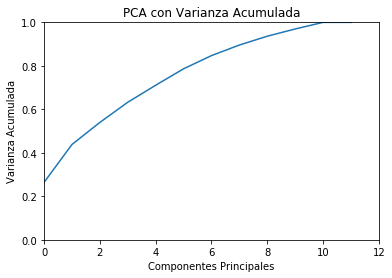

In [8]:
#Varianza acumulada
fil, col = datosEscalados.shape

ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(datosEscalados)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA con Varianza Acumulada')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

In [9]:
Valores_Singulares = Componentes.singular_values_ # Se calcula los valores singulares por componente principal
Valores_Singulares #Para verificar cuales componentes son las que acumulan la mayor cantidad de información

array([8.12802745e+01, 6.59617826e+01, 5.03645378e+01, 4.81295217e+01,
       4.42226215e+01, 4.34874708e+01, 3.89243569e+01, 3.48527714e+01,
       3.18512655e+01, 2.88315354e+01, 2.75833427e+01, 1.19792973e-16])

In [10]:
#Se usa el 95% de varianza para explicar el modelo
Nuevas_Componentes = PCA(0.95, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False) 
Nuevos_Datos = Nuevas_Componentes.fit_transform(datosEscalados) 
print(datosEscalados.shape) # Tamaño de los datos originales
print(Nuevos_Datos.shape)

(22327, 12)
(22327, 10)


In [11]:
X_Reconstruido = Nuevas_Componentes.inverse_transform(Nuevos_Datos)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido.shape

(22327, 12)

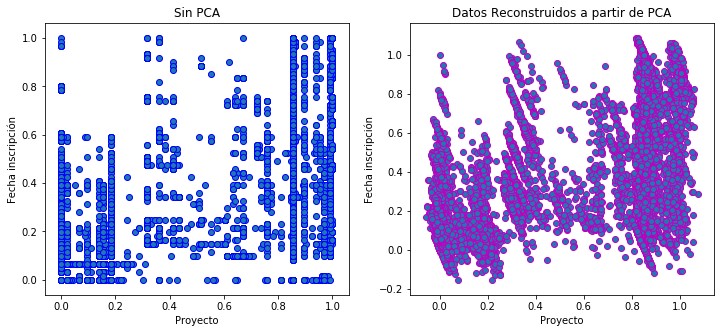

In [12]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('Proyecto')
pyplot.ylabel('Fecha inscripción')
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido[:,0], X_Reconstruido[:,1], edgecolors="m")
pyplot.xlabel('Proyecto')
pyplot.ylabel('Fecha inscripción')
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

# Clustering

# K-means

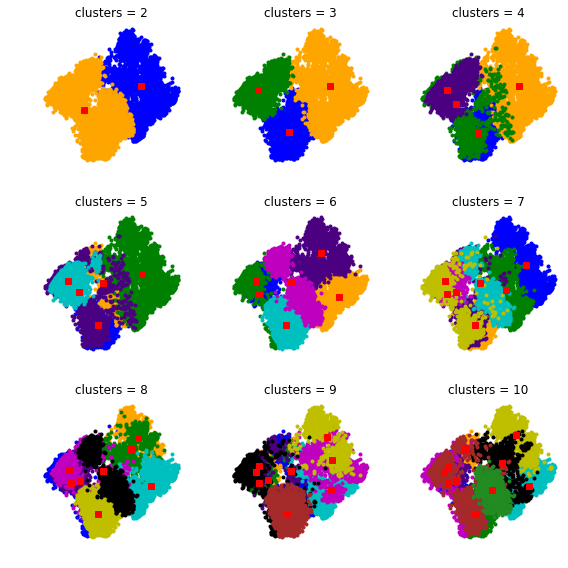

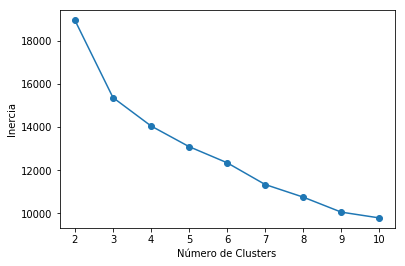

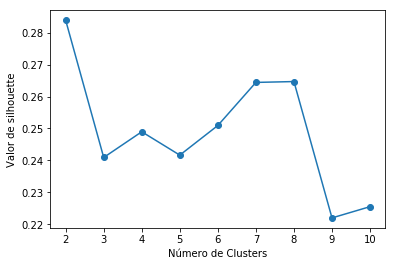

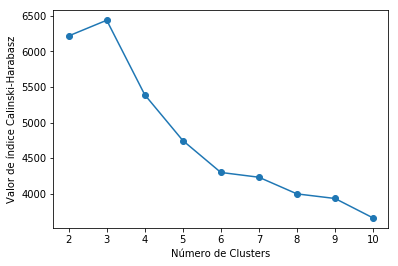

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz

from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

inercia = []
silhouette_valores = []
ch_valores = []

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # Se construye el modelo Kmeans
    # n_clusters es el número de clusters
    # init es la condición inicial de los centros. 'random' signfica que se genera aleatoriamente los centros.
    # Se puede usar en int la opción ‘k-means++’, el cual selecciona los centros iniciales del cluster para
    # que el algoritmo de una manera inteligente converga rápidamente. Se aconseja usar esta opción para datos de alta
    # dimensionalidad.
    # n_init es el número de veces que el algoritmo actualiza los centros. Por defecto es 10 pero puedes cambiar el valor.
    # tol es el error que se desea superar.
    # max_iter es el número de iteraciones.
    # precompute_distances es una opción para pre-calcular las distancias. Si seleccionas 'True', entonces siempre se pre-calcula
    # las distancias. Si es 'False', entonces nunca se pre-calcula las distancias. Si es 'auto', entonces se selecciona
    # 'True' o 'False' de acuerdo al número de muestras y el número de clases. Se recomienda esta última opción.
    # algorithm es el algoritmo K-means a utilizar. Si es "full", se aplica el estilo clásico del algoritmo. Si es "elkan",
    # se aplica una variación del algoritmo k-means para mayor eficiencia pero se recomienda para datos que no esten tan
    # esparcidos. Si es "auto", entonces selecciona "elkan" si los datos son densos o "full" si los datos son esparcidos.
    Modelo_Kmeans = KMeans(n_clusters = ncenters, init = 'random', n_init = 20, max_iter = 1000, tol = 1e-4,
                      precompute_distances = 'auto', random_state = mantener_valor_aleatorio, algorithm = 'auto')
    Modelo_Kmeans.fit_predict(Nuevos_Datos) # se predice las etiquetas que se asocian a los datos
    Etiquetas = Modelo_Kmeans.labels_ # Calcula las clases o etiquetas
    centros = Modelo_Kmeans.cluster_centers_ # Calcula la matriz de centros
    inercia.append(Modelo_Kmeans.inertia_) # optimiza el punto de inercia de acuerdo al número de clusters
    silhouette_valores.append(silhouette_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabasz_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Calinski-Harabasz
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])
        
    print("Para ", ncenters, " Clusters: ")   
    for i in range (len(np.unique(Etiquetas)) -1):
        print("El total de datos de la clase ", i, " son: ", len(Etiquetas[Etiquetas==i]))

    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig2, ax2 = pyplot.subplots()
ax2.plot(np.r_[2:11], inercia, marker = 'o')
ax2.set_xlabel("Número de Clusters")
ax2.set_ylabel("Inercia")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()

## DBSCAN

Se realiza la prueba con eps: 0.7
y con minimas muestras: 200
Número estimado de datos con ruido: 783
El total de datos de la clase  0  son:  4754
El total de datos de la clase  1  son:  14373
El total de datos de la clase  2  son:  1221
El total de datos de la clase  3  son:  958
El total de datos de la clase  4  son:  238


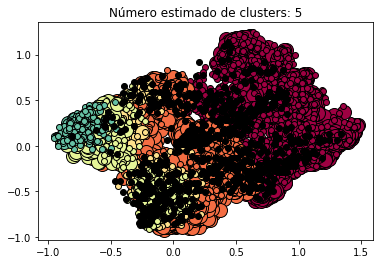

Se realiza la prueba con eps: 0.7
y con minimas muestras: 100
Número estimado de datos con ruido: 555
El total de datos de la clase  0  son:  4777
El total de datos de la clase  1  son:  14373
El total de datos de la clase  2  son:  1376
El total de datos de la clase  3  son:  987
El total de datos de la clase  4  son:  259


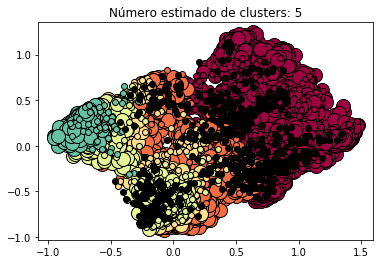

Se realiza la prueba con eps: 0.7
y con minimas muestras: 50
Número estimado de datos con ruido: 315
El total de datos de la clase  0  son:  4779
El total de datos de la clase  1  son:  14373
El total de datos de la clase  2  son:  1407
El total de datos de la clase  3  son:  990
El total de datos de la clase  4  son:  106
El total de datos de la clase  5  son:  268
El total de datos de la clase  6  son:  89


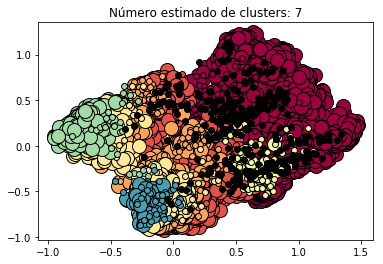

Se realiza la prueba con eps: 0.9
y con minimas muestras: 200
Número estimado de datos con ruido: 456
El total de datos de la clase  0  son:  19152
El total de datos de la clase  1  son:  1412
El total de datos de la clase  2  son:  998
El total de datos de la clase  3  son:  309


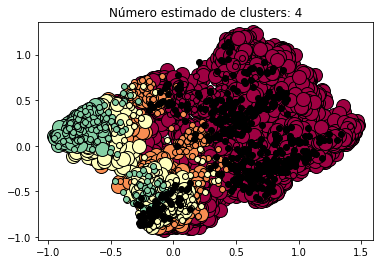

Se realiza la prueba con eps: 0.9
y con minimas muestras: 100
Número estimado de datos con ruido: 200
El total de datos de la clase  0  son:  19152
El total de datos de la clase  1  son:  1617
El total de datos de la clase  2  son:  999
El total de datos de la clase  3  son:  359


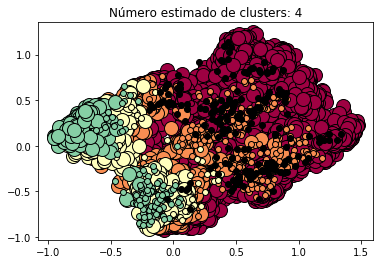

Se realiza la prueba con eps: 0.9
y con minimas muestras: 50
Número estimado de datos con ruido: 70
El total de datos de la clase  0  son:  19152
El total de datos de la clase  1  son:  1740
El total de datos de la clase  2  son:  999
El total de datos de la clase  3  son:  366


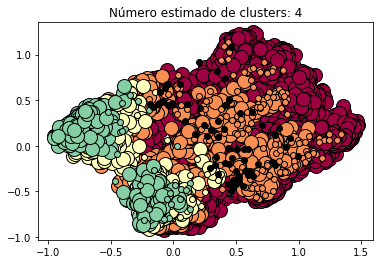

Se realiza la prueba con eps: 1
y con minimas muestras: 200
Número estimado de datos con ruido: 169
El total de datos de la clase  0  son:  22158


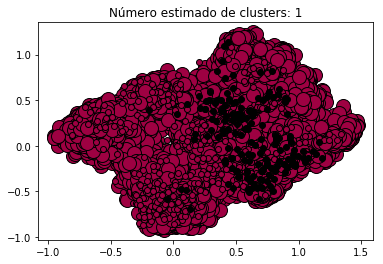

Se realiza la prueba con eps: 1
y con minimas muestras: 100
Número estimado de datos con ruido: 28
El total de datos de la clase  0  son:  22299


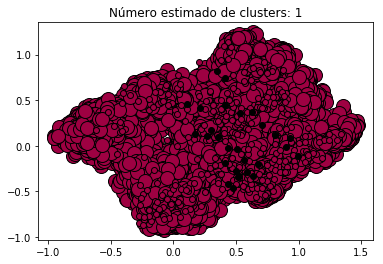

Se realiza la prueba con eps: 1
y con minimas muestras: 50
Número estimado de datos con ruido: 12
El total de datos de la clase  0  son:  22315


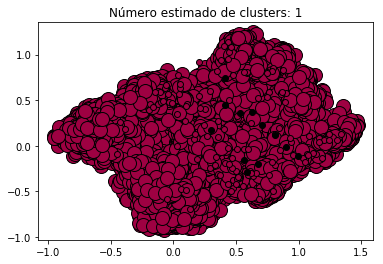

In [21]:
from sklearn.cluster import DBSCAN # Se aplica el algoritmo de clustering DBSCAN
from sklearn.datasets import make_moons # base de datos de las lunas 
import mglearn


epss = [0.1,0.3,0.5,0.7,0.9]
mins = [100, 200, 50]
#mins = [500,1000,2000,6000,100]

for eps in epss:
    for mi in mins:
        
        print ("Se realiza la prueba con eps:", eps)
        print ("y con minimas muestras:", mi)
        Modelo_DBSCAN_Basico = DBSCAN(eps = eps, metric = 'euclidean', algorithm = 'auto', leaf_size = 10, min_samples = mi) 
        Modelo_DBSCAN_Basico.fit_predict(Nuevos_Datos)
        Etiquetas = Modelo_DBSCAN_Basico.labels_ # Calcula las clases o etiquetas con ruido
        centros = Modelo_DBSCAN_Basico.components_ # Calcula la matriz de centros nucleares
        core_samples_mask = np.zeros_like(Etiquetas, dtype=bool)
        core_samples_mask[Modelo_DBSCAN_Basico.core_sample_indices_] = True     
        n_clusters_ = len(set(Etiquetas)) - (1 if -1 in Etiquetas else 0)
        n_ruido_ = list(Etiquetas).count(-1)
        Clases_Sin_Ruido = Modelo_DBSCAN_Basico.labels_ # Calcula las clases o etiquetas sin ruido

        unique_labels = set(Clases_Sin_Ruido)
        colors = [pyplot.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]

        print('Número estimado de datos con ruido: %d' % n_ruido_)

        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Los puntos negros significan datos con ruido y que no pudieron ser agrupados
                col = [0, 0, 0, 1]

            class_member_mask = (Clases_Sin_Ruido == k)

            xy = Nuevos_Datos[class_member_mask & core_samples_mask]
            pyplot.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = Nuevos_Datos[class_member_mask & ~core_samples_mask]
            pyplot.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        #print("Para ", ncenters, " Clusters: ")   
        for i in range (len(np.unique(Etiquetas)) -1):
            print("El total de datos de la clase ", i, " son: ", len(Etiquetas[Etiquetas==i]))

        pyplot.title('Número estimado de clusters: %d' % n_clusters_)
        pyplot.show()

# GK-Means

C:\Users\Daniel\Anaconda3\lib\site-packages\skcmeans\algorithms.py:451: RuntimeWarning: invalid value encountered in power
  A = (np.linalg.det(covariance) ** (1 / p))[..., np.newaxis, np.newaxis] * np.linalg.inv(covariance)
C:\Users\Daniel\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


TypeError: 'NoneType' object does not support item assignment

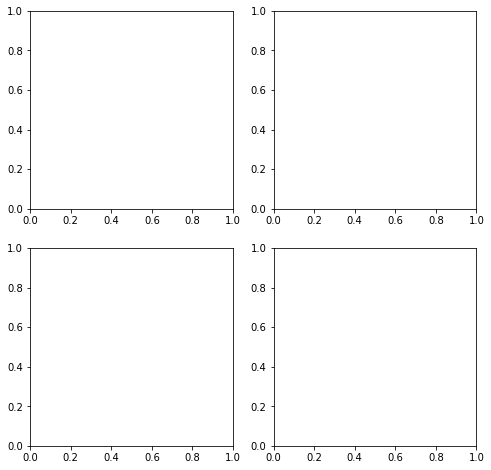

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy
from skcmeans.algorithms import Probabilistic, GustafsonKesselMixin # Algoritmo GK probabilístico

from cvi import * # Indices de validación interna

# cvi es una librería desarrollada por 99991
# ir a la url: https://github.com/99991/FuzzyClustering/blob/master/cvi.py
# pip install git+git://github.com/bm424/scikit-cmeans.git@master


class GKProbabilistic(Probabilistic, GustafsonKesselMixin):
    pass
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

fig1, axes1 = plt.subplots(2, 2, figsize=(8, 8))
resultados = []
cs = np.arange(2, 6) # Rango de número mínimo y máximo de clusters
mantener_valor_aleatorio = check_random_state(1000)

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    modelo_GK = GKProbabilistic(n_clusters = ncenters, n_init = 20, max_iter = 300, 
                                tol=1e-3, verbosity = 0, random_state = mantener_valor_aleatorio, eps = 1e-18)
    Ajuste = modelo_GK.fit(Nuevos_Datos)
    U = Ajuste.calculate_memberships(Nuevos_Datos)
    centros = Ajuste.calculate_centers(Nuevos_Datos)
    cluster_membership = np.argmax(U.T, axis=0)
    
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])
    
    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
        
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off')
    
    resultados.append([])
    for method in methods:
        resultado = method(Nuevos_Datos, U.T, centros, m = 2)
        resultados[-1].append(resultado)

plt.tight_layout()
plt.show()

resultados = np.array(resultados)

ny = 4
nx = 2

for i, method in enumerate(methods):
    plt.subplot(ny, nx, 1 + i)
    column = resultados[:, i]
    plt.plot(cs, column)
    if targets[i] == "min":
        ncenters = cs[np.argmin(column)]
    else:
        ncenters = cs[np.argmax(column)]
    plt.title("%s, %s es de %d"%(method.__name__, targets[i], ncenters))   
    plt.plot([ncenters, ncenters],[np.min(column), np.max(column)])

plt.tight_layout()
plt.show()

In [16]:
ncenters = 2

modelo_GK = GKProbabilistic(n_clusters = ncenters, n_init = 20, max_iter = 300, 
                                tol=1e-3, verbosity = 0, random_state = mantener_valor_aleatorio, eps = 1e-18)
Ajuste = modelo_GK.fit(Nuevos_Datos)

U = Ajuste.calculate_memberships(Nuevos_Datos)

Target = np.argmax(U.T, axis=0)

print(len(Target))

Datos_para_clasificar = Nuevos_Datos

Clases = Target

print("Para ", ncenters, " Clusters: ")   
for i in range (len(np.unique(Clases))):       
    print("El total de datos de la clase ", i, " son: ", len(Clases[Clases==i]))


TypeError: 'NoneType' object does not support item assignment